## Импорт данных

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import ANN_classes as ann
import custom_classes as cc
from importlib import reload
import scipy.interpolate
from matplotlib.ticker import FuncFormatter

In [512]:
reload(ann)

<module 'ANN_classes' from '/home/quantumfox/JupyterWorkfolder/Py3/ANN/ANN_classes.py'>

In [513]:
ann.vercheck('0.10.0')

ANN vercheck OK


In [108]:
csvdata = []
with open('data_m.csv') as data_file:
    reader = csv.reader(data_file)
    for row in reader: 
        csvdata.append(row)
csvdata = np.array(csvdata, dtype=float)

## Проверка на искусственном массиве данных

In [489]:
in_x = np.sort(np.random.random(100)*10)
in_y = [item**2 for item in in_x]

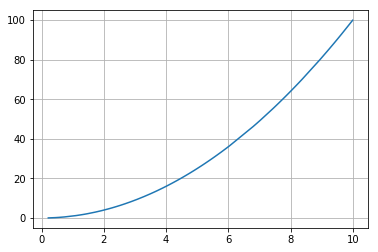

In [490]:
plt.figure()
plt.plot(in_x, in_y)
plt.grid()
plt.show()

In [529]:
ann3 = ann.NNetwork(1,5,1)
ann3.cfg_input(1)
# ann3.cfg_mass()
ann3.cfg_type()
ann3.nwgh_randomize(0.6, 0.2)
iterc = 0

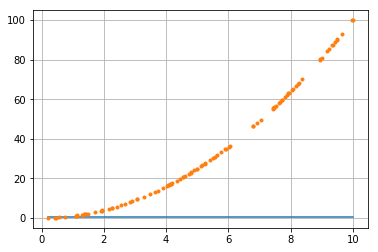

1


In [531]:
for _ in range(1):
    iterc += 1
    pick = np.random.randint(len(in_x))
    ann3.forward([in_x[pick]])
    ann3.getnetgrad([in_y[pick]])
    ann3.backward()
    ann3.ncommit()

ann_in_y = [ann3.forward([in_x[item]])[0][0] for item in range(len(in_x))]

plt.figure()
plt.plot(in_x, ann_in_y)
plt.plot(in_x, in_y, '.')
plt.grid()
plt.show()
print(iterc)

In [538]:
ann3.Loo[0].Vw.v

array([ 0.80534757,  0.49923112,  0.86371026,  0.52091703,  0.68762297,
        0.61790524])

In [533]:
ann3.L1[0].Viws.v

-25.941579173580141

In [549]:
ann3.Lii[0].Voo

In [1857]:
[ann3.forward([in_x[item]])[0][0] for item in range(len(in_x))]

[13.79013029779739,
 13.82232773231304,
 13.82546384052989,
 13.83457950260253,
 13.846922445825376,
 13.870894799632778,
 13.890829319117895,
 13.893520472525619,
 13.915454624573636,
 13.960484876767262,
 13.967242234817721,
 14.015339098798229,
 14.159057773168819,
 14.178170925382284,
 14.283306845300958,
 14.293349681335618,
 14.305269557555908,
 14.365158523147159,
 14.371819412174661,
 14.452027981645285,
 14.496228192527395,
 14.513156176055572,
 14.538316763645513,
 14.604079244568586,
 14.640299004800459,
 14.667617755479101,
 14.682484261037766,
 14.737591156689728,
 14.763569857628076,
 14.77340881114459,
 14.805547197611473,
 14.81868858056583,
 14.829278958829111,
 14.843373891635709,
 14.869920458863854,
 14.911548127242385,
 14.925891471949789,
 14.932445593398596,
 14.941301311350896,
 14.947657186948719,
 15.069333497837061,
 15.080869906282715,
 15.130954777944568,
 15.146502375172398,
 15.161251447344682,
 15.185300483197395,
 15.190679019861308,
 15.199761209141009